In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.pyplot import scatter

import torch
import torchvision.models as models
from PIL import Image
from img2vec_pytorch import Img2Vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Mounted at /content/drive


In [ ]:
# loading images
print('Loading images...')
images = np.load('./data/Blockdaemon_NFT_Contracts/images.npz')

# Initialize Img2Vec with GPU
vec_length = 512
img2vec = Img2Vec(cuda=True, model='resnet-18')

# Submit a list
# vectors = img2vec.get_vec(list_of_PIL_images)

# Or
vec_mat = np.zeros((len(images), vec_length))
for index, img in enumerate(images):
  try:
    vec = img2vec.get_vec(img)
  except:
    continue
    vec_mat[index, :] = vec

In [ ]:
print('Applying PCA...')
reduced_data_intermediate = PCA(n_components=50).fit_transform(vec_mat)
reduced_data_final = TSNE(n_components=3, n_jobs = -1).fit_transform(reduced_data_intermediate)

kmeans = KMeans(init='k-means++', n_clusters=6, n_init=10)
kmeans.fit(reduced_data_final)

print('Predicting...')
preds = kmeans.predict(reduced_data_final)
labels = kmeans.labels_

print('Done!')

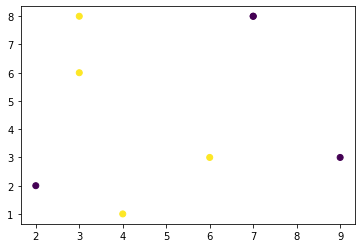

In [ ]:
# Visualization
scatter(x=reduced_data_final[:,0], y=reduced_data_final[:,1], c=labels)
